<h3> Importo as bibliotecas

In [2]:
import numpy as np
from keras.models import load_model # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout, Input # type: ignore
from keras.regularizers import l2 # type: ignore
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error

<h3> Carrego os arquivos de treino, validação e teste para a memória

In [4]:
ARQUIVO_TREINO = "/Program Files/GitHub/estudos/faculdade/PIBIC/principal/dados/treino.csv"
ARQUIVO_VALIDACAO = "/Program Files/GitHub/estudos/faculdade/PIBIC/principal/dados/validacao.csv"
ARQUIVO_TESTE = "/Program Files/GitHub/estudos/faculdade/PIBIC/principal/dados/teste.csv"

                                                                                    #usecols é para ele carregar apenas as colunas que quero
arr = np.loadtxt(ARQUIVO_TREINO, delimiter = ',' , dtype = float, skiprows=1, usecols=[1,2,3,5,6,7,9]) 
xVector_treino = arr[ : ,  [0, 1, 2, 3, 4, 5]] #B, C, D, F, G, H               #skiprows é pra pular a primeira linha (que informa o que é aquele dado) -> transit, fast transit...
yVector_treino = arr[ : , 6] # J

                                                                                    #usecols é para ele carregar apenas as colunas que quero
arr = np.loadtxt(ARQUIVO_VALIDACAO, delimiter = ',' , dtype = float, skiprows=1, usecols=[1,2,3,5,6,7,9]) 
xVector_validacao = arr[ : ,  [0, 1, 2, 3, 4, 5]] #B, C, D, F, G, H               #skiprows é pra pular a primeira linha (que informa o que é aquele dado) -> transit, fast transit...
yVector_validacao = arr[ : , 6] # J

                                                                                    #usecols é para ele carregar apenas as colunas que quero
arr = np.loadtxt(ARQUIVO_TESTE, delimiter = ',' , dtype = float, skiprows=1, usecols=[1,2,3,5,6,7,9]) 
xVector_teste = arr[ : ,  [0, 1, 2, 3, 4, 5]] #B, C, D, F, G, H               #skiprows é pra pular a primeira linha (que informa o que é aquele dado) -> transit, fast transit...
yVector_teste = arr[ : , 6] # J

<h3> Configuro o modelo e inicio o treinamento

<h5>Epochs: O número de vezes que o modelo percorre todo o conjunto de dados de treinamento. Mais epochs podem melhorar o aprendizado, mas também aumentam o risco de overfitting.

<h5>Batch Size: O número de amostras de treinamento processadas antes de atualizar os pesos do modelo. Um batch size menor oferece atualizações mais frequentes, enquanto um maior pode aproveitar melhor o paralelismo do hardware.

<h5>Dropout: Uma técnica de regularização que desativa aleatoriamente uma fração de neurônios durante o treinamento para prevenir overfitting, ajudando o modelo a generalizar melhor.

<h5>Kernel Regularizer: Adiciona uma penalização aos pesos da camada (como L1 ou L2) durante o treinamento, para evitar que os pesos se tornem muito grandes e para reduzir o overfitting

In [47]:
num_colunas = xVector_treino.shape[1]
num_colunas = int(xVector_treino.shape[1])

# Definindo a MLP
model = Sequential()
model.add(Input(shape=(num_colunas,)))  # Neurônios de Entrada
model.add(Dense(6, activation='relu', kernel_regularizer=l2(0.001))) # Neurônios de camada oculta
#model.add(Dropout(0.1))
model.add(Dense(6, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.1))
model.add(Dense(6, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.1))
model.add(Dense(1)) # Neurônio de saída

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# Treinamento do modelo com validação
history = model.fit(
    xVector_treino, yVector_treino, 
    epochs=256, 
    batch_size=8, 
    shuffle=True, 
    verbose=2,
    validation_data=(xVector_validacao, yVector_validacao))

# Salvando o modelo completo em um arquivo
model.save('modelo_mlp.keras')

Epoch 1/256
245/245 - 2s - 8ms/step - loss: 1430.5422 - mean_absolute_error: 27.6795 - mean_squared_error: 1430.5256 - val_loss: 31.8160 - val_mean_absolute_error: 5.5394 - val_mean_squared_error: 31.8006
Epoch 2/256
245/245 - 0s - 1ms/step - loss: 9.4300 - mean_absolute_error: 2.7099 - mean_squared_error: 9.4166 - val_loss: 1.0294 - val_mean_absolute_error: 0.9716 - val_mean_squared_error: 1.0175
Epoch 3/256
245/245 - 0s - 1ms/step - loss: 0.2942 - mean_absolute_error: 0.4189 - mean_squared_error: 0.2832 - val_loss: 0.0227 - val_mean_absolute_error: 0.0938 - val_mean_squared_error: 0.0124
Epoch 4/256
245/245 - 0s - 1ms/step - loss: 0.0378 - mean_absolute_error: 0.0848 - mean_squared_error: 0.0280 - val_loss: 0.0205 - val_mean_absolute_error: 0.0819 - val_mean_squared_error: 0.0111
Epoch 5/256
245/245 - 0s - 1ms/step - loss: 0.0371 - mean_absolute_error: 0.0853 - mean_squared_error: 0.0281 - val_loss: 0.0198 - val_mean_absolute_error: 0.0795 - val_mean_squared_error: 0.0111
Epoch 6/256

KeyboardInterrupt: 

<h3> Serve para continuar a execução de um modelo já salvo! (não precisa rodar direto)

In [26]:
model = load_model('modelo_mlp.keras')

# Treinamento do modelo com validação
history = model.fit(
    xVector_treino, yVector_treino, 
    epochs=0, # Mudar a época para quantos eu quiser rodar a mais (deixei 0 para caso eu rode sem querer) 
    batch_size=64, 
    shuffle=True, 
    verbose=2,
    validation_data=(xVector_validacao, yVector_validacao))

# Salvando o modelo completo em um arquivo
model.save('modelo_mlp.keras')

<h3> Calculo as métricas de erro

In [41]:
# Carrego o modelo
model = load_model('modelo_mlp.keras')

# Fazendo previsões no conjunto de teste
y_pred = model.predict(xVector_teste)

# Avaliação do modelo com essas 5 métricas (R² ficou esquisito)
loss, mse, mae = model.evaluate(xVector_teste, yVector_teste, verbose=0)
median_ae = median_absolute_error(yVector_teste, y_pred)
mape = mean_absolute_percentage_error(yVector_teste, y_pred)
r2 = r2_score(yVector_teste, y_pred)

print(f'\nMean Squared Error no conjunto de teste: {mse:.5f}')
print(f'Mean Absolute Error no conjunto de teste: {mae:.5f}')
print(f'Median Absolute Error no conjunto de teste: {median_ae:.5f}')
print(f'Mean Absolute Percentage Error no conjunto de teste: {mape:.5f}')
print(f'R² no conjunto de teste: {r2:.5f}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Mean Squared Error no conjunto de teste: 0.00104
Mean Absolute Error no conjunto de teste: 0.01683
Median Absolute Error no conjunto de teste: 0.01162
Mean Absolute Percentage Error no conjunto de teste: 0.02911
R² no conjunto de teste: 0.94702


<h3> Plotando para comparar

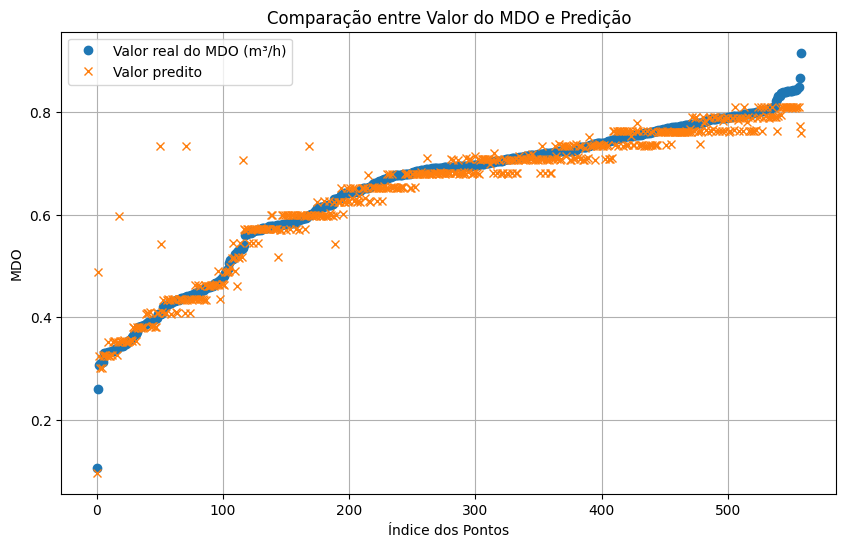

In [42]:
# Ordenar os dados com base nos valores reais
sorted_indices = np.argsort(yVector_teste)
y_test_sorted = yVector_teste[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Comparando os valores reais e preditos ordenados
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Valor real do MDO (m³/h)', linestyle='None', marker='o')
plt.plot(y_pred_sorted, label='Valor predito', linestyle='None', marker='x')
plt.title('Comparação entre Valor do MDO e Predição')
plt.xlabel('Índice dos Pontos')
plt.ylabel('MDO')
plt.legend()
plt.grid(True)
plt.show()